<a href="https://colab.research.google.com/github/DanielMora97/Proyecto-de-grado/blob/main/Encuestas/Resultados_Encuesta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy.stats import spearmanr
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
from IPython.display import set_matplotlib_formats

#Datos

In [18]:
data = {
    'API Calidez':   [-1	,-1	,0	,-1	,-1	,0	,0	,1	,0	,1	,2	,0	,-1	,0	,-2	,-2	,1],
    'API Agradable': [ 0	,0	,-1	,1	,-1	,1	,0	,1	,0	,1	,1	,-1	,0	,1	,1	,-2	,1],

    'Manley Calidez':   [-2	,-2	,1	,-2	,-2	,-1	,-1	,-2	,-2	,-1	,-1	,1	,0	,-2	,-1	,-1	,2],
    'Manley Agradable': [-1	,-1	,0	,-1	,0	,0	,-2	,-1	,-1	,0	,-1	,-2	,1	,-1	,0	,-1	,1],

    'Tubos Calidez':   [0	,1	,1	,1	,1	,1	,-1	,-1	,1	,2	,1	,-1	,2	,1	,1	,0	,1],
    'Tubos Agradable': [0	,1	,1	,1	,1	,0	,-1	,2	,1	,1	,2	,0	,2	,1	,-1	,0	,0],

    'Opamp Calidez':   [0	,0	,1	,2	,0	,2	,-1	,2	,1	,0	,2	,-2	,1	,2	,1	,1	,-1],
    'Opamp Agradable': [0	,0	,0	,2	,1	,1	,0	,-1	,0	,2	,2	,1	,2	,0	,1	,1	,0]
}

df = pd.DataFrame(data)

# Mostrar las primeras filas
print(df)

    API Calidez  API Agradable  Manley Calidez  Manley Agradable  \
0            -1              0              -2                -1   
1            -1              0              -2                -1   
2             0             -1               1                 0   
3            -1              1              -2                -1   
4            -1             -1              -2                 0   
5             0              1              -1                 0   
6             0              0              -1                -2   
7             1              1              -2                -1   
8             0              0              -2                -1   
9             1              1              -1                 0   
10            2              1              -1                -1   
11            0             -1               1                -2   
12           -1              0               0                 1   
13            0              1              -2  

#Test de Normalidad Saphiro-Wilk
Estamos asumiendo

*   H0: Los datos están distribuidos normalmente.
*   H1: Los datos no están distribuidos normalmente.

Nivel de confianza del 95%

*   p = 0.05


                       W p-value Normal?
API Calidez       0.9302  0.2194      Sí
API Agradable     0.8092  0.0027      No
Manley Calidez    0.7989   0.002      No
Manley Agradable   0.878  0.0295      No
Tubos Calidez     0.7994   0.002      No
Tubos Agradable     0.89  0.0464      No
Opamp Calidez     0.8923  0.0505      Sí
Opamp Agradable   0.8655  0.0187      No


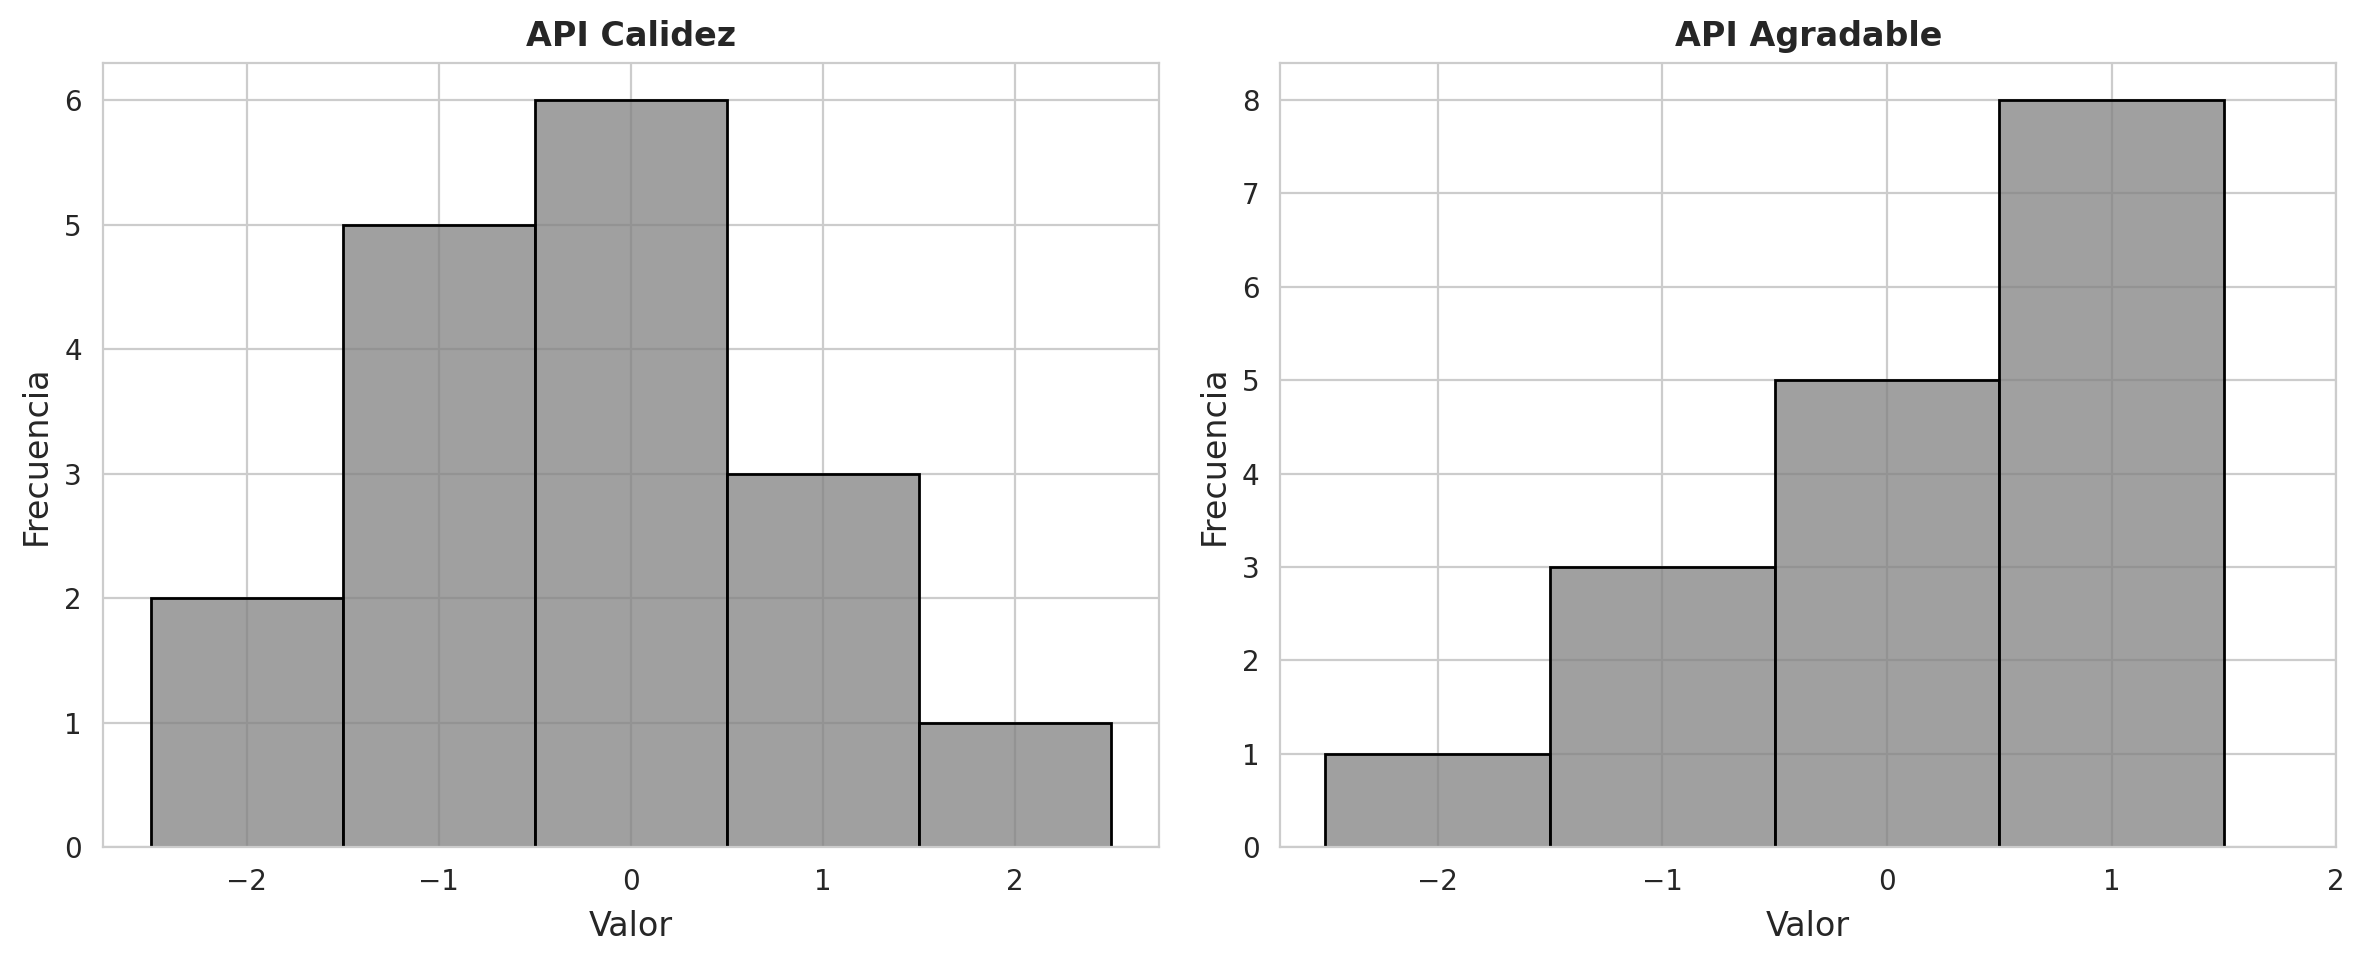

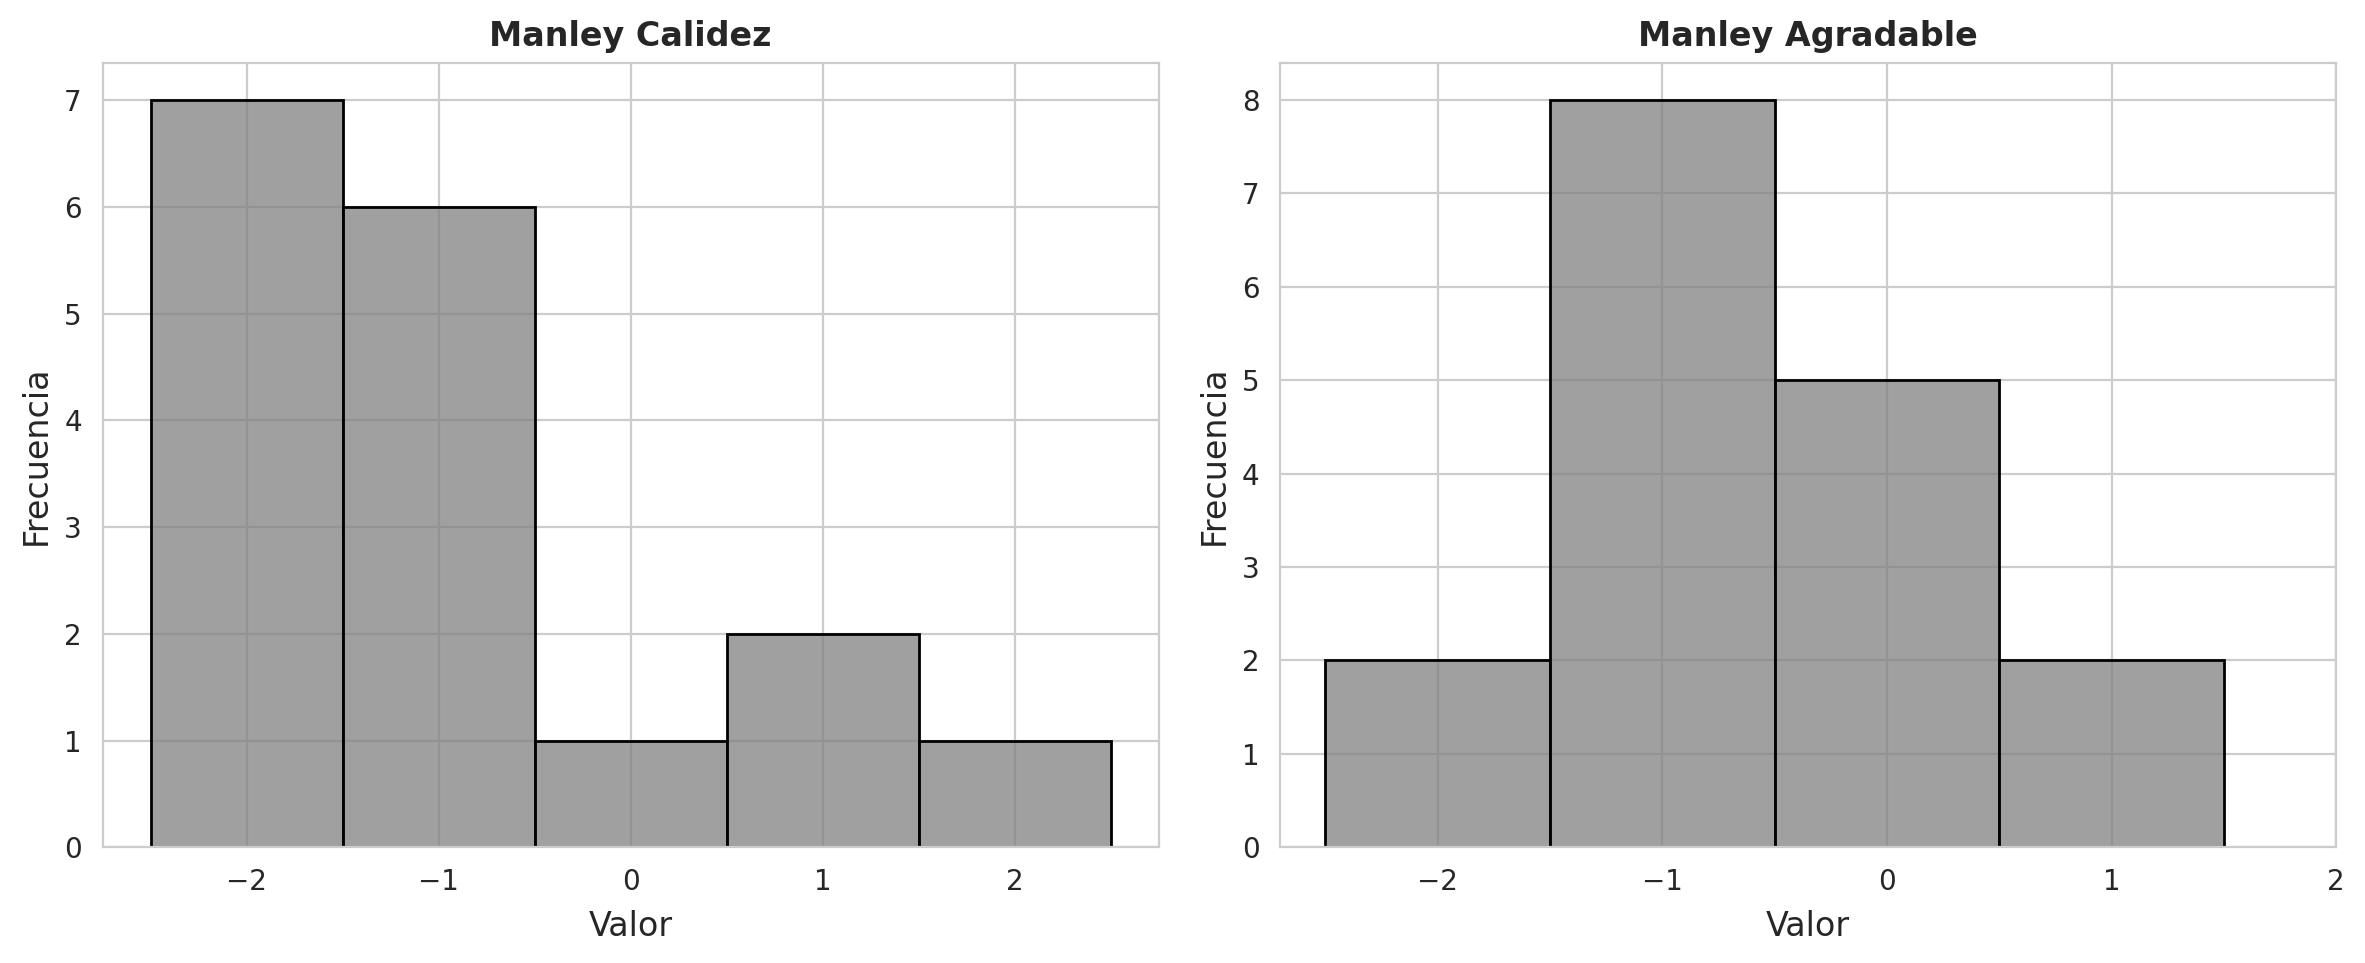

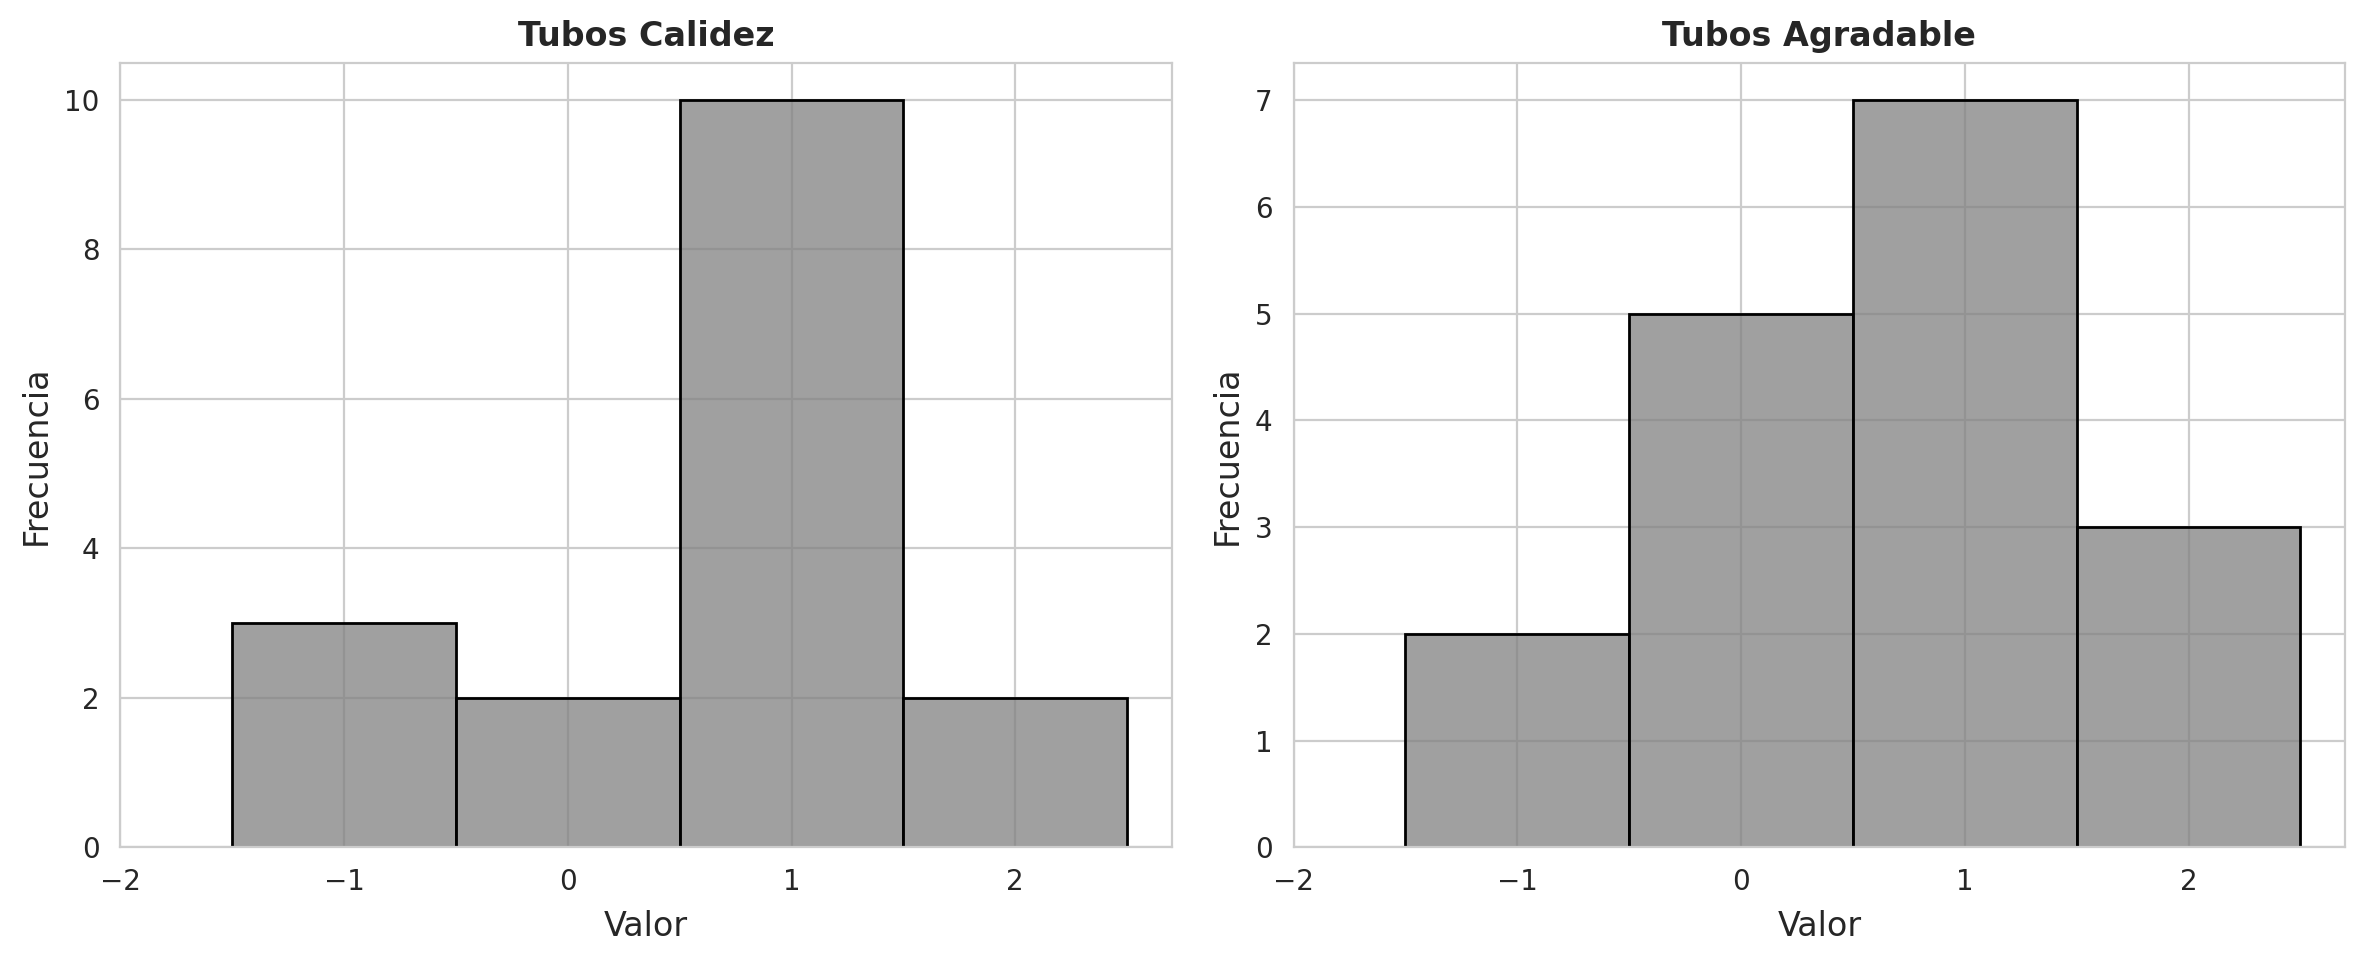

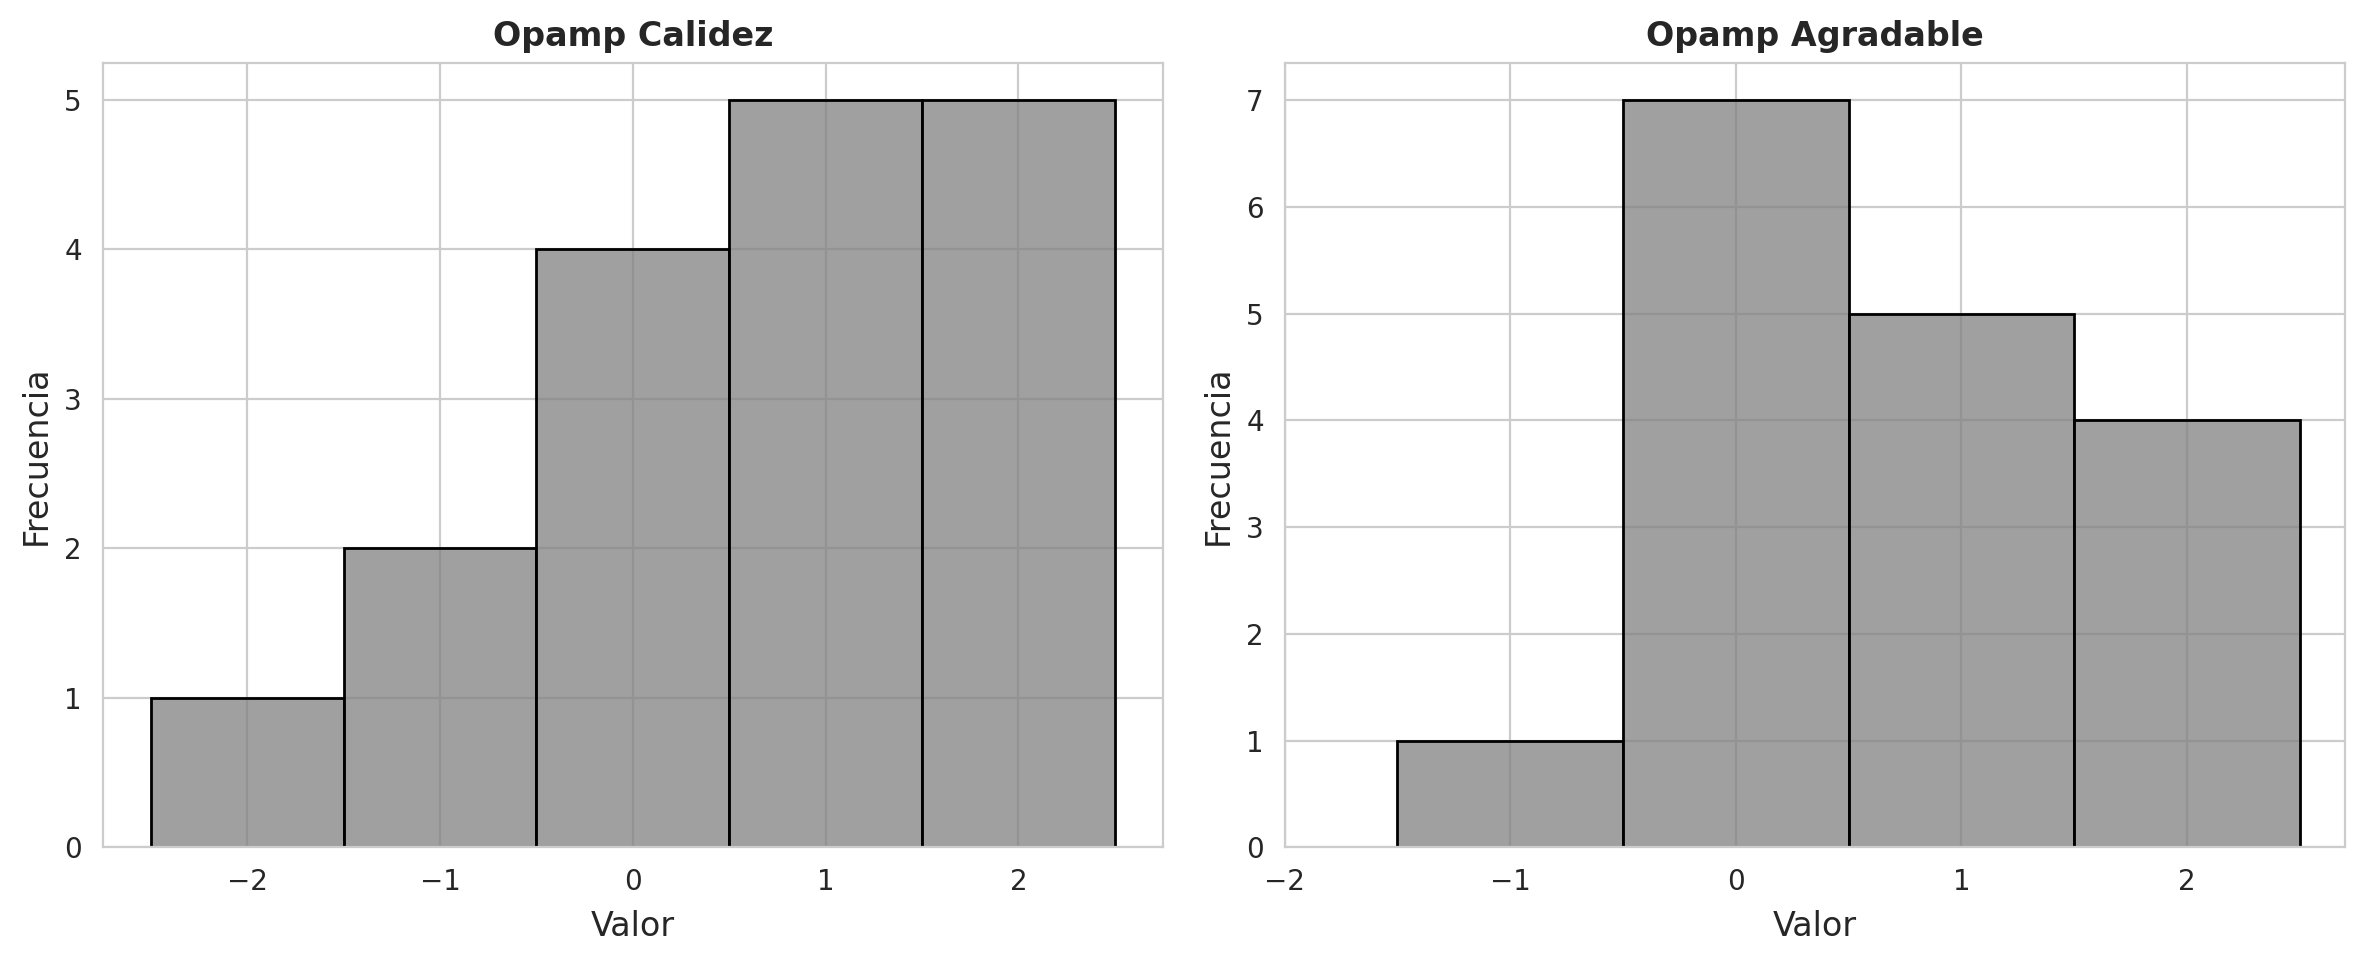

In [19]:


# Estilo tipo LaTeX
mpl.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.titlesize": 12
})
sns.set_style("whitegrid")

# Función para aplicar la prueba de Shapiro-Wilk
def test_normalidad(df):
    resultados = {}
    for columna in df.columns:
        stat, p = shapiro(df[columna])
        resultados[columna] = {
            'W': round(stat, 4),
            'p-value': round(p, 4),
            'Normal?': 'Sí' if p > 0.05 else 'No'
        }
    return pd.DataFrame(resultados).T

# Ejecutar la prueba
resultado_normalidad = test_normalidad(df)
print(resultado_normalidad)

# Mostrar histogramas en pares (Calidez y Agradable de cada equipo)
columnas = list(df.columns)
for i in range(0, len(columnas), 2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    for j in range(2):
        if i + j < len(columnas):
            sns.histplot(df[columnas[i + j]], bins=5, kde=False, ax=axes[j],
                         discrete=True, color="gray", edgecolor="black")
            axes[j].set_title(columnas[i + j], fontweight='bold')
            axes[j].set_xlabel("Valor", labelpad=5)
            axes[j].set_ylabel("Frecuencia")
            axes[j].set_xticks([-2, -1, 0, 1, 2])
            axes[j].tick_params(axis='both', which='major', length=4)
    plt.tight_layout(h_pad=2.5)
    plt.show()

#Estadistica descriptiva

In [20]:
#Cálculo de mediana y rango intercuartílico (RIQ)
df = pd.DataFrame(data)
estadisticas = pd.DataFrame({
    "Mediana": df.median(),
    "RIQ": df.quantile(0.75) - df.quantile(0.25)
})

# Correlaciones de Spearman (Calidez vs Agradable por cada tipo)
correlaciones = {}
pares = [("API Calidez", "API Agradable"),
         ("Manley Calidez", "Manley Agradable"),
         ("Tubos Calidez", "Tubos Agradable"),
         ("Opamp Calidez", "Opamp Agradable")]

for x, y in pares:
    rho, pval = spearmanr(df[x], df[y])
    correlaciones[f"{x} vs {y}"] = {"Spearman ρ": round(rho, 3), "p-value": round(pval, 4)}

correlaciones_df = pd.DataFrame(correlaciones).T

estadisticas, correlaciones_df

(                  Mediana  RIQ
 API Calidez           0.0  1.0
 API Agradable         0.0  1.0
 Manley Calidez       -1.0  1.0
 Manley Agradable     -1.0  1.0
 Tubos Calidez         1.0  1.0
 Tubos Agradable       1.0  1.0
 Opamp Calidez         1.0  2.0
 Opamp Agradable       1.0  1.0,
                                     Spearman ρ  p-value
 API Calidez vs API Agradable             0.445   0.0735
 Manley Calidez vs Manley Agradable       0.360   0.1560
 Tubos Calidez vs Tubos Agradable         0.407   0.1046
 Opamp Calidez vs Opamp Agradable         0.147   0.5747)

#Prueba U de Mann Whitney

In [21]:
# Comparaciones por par
pares_calidez = [
    ('API Calidez', 'Manley Calidez'),
    ('API Calidez', 'Tubos Calidez'),
    ('API Calidez', 'Opamp Calidez'),
    ('Tubos Calidez', 'Opamp Calidez'),
    ('Manley Calidez', 'Tubos Calidez')
]

pares_agrado = [
    ('API Agradable', 'Manley Agradable'),
    ('API Agradable', 'Tubos Agradable'),
    ('API Agradable', 'Opamp Agradable'),
    ('Tubos Agradable', 'Opamp Agradable'),
    ('Manley Agradable', 'Tubos Agradable')
]

# Función para aplicar Mann-Whitney U
def test_mannwhitney(pares):
    resultados = []
    for a, b in pares:
        stat, p = mannwhitneyu(df[a], df[b], alternative='two-sided')
        resultados.append({
            'Comparación': f"{a} vs {b}",
            'U': round(stat, 2),
            'p-valor': round(p, 4),
            '¿Diferencia significativa?': 'Sí' if p < 0.05 else 'No'
        })
    return pd.DataFrame(resultados)

# Ejecutar pruebas
resultados_calidez = test_mannwhitney(pares_calidez)
resultados_agrado = test_mannwhitney(pares_agrado)

print('Calidez\n', resultados_calidez)

print('Agradababilidad\n', resultados_agrado)


Calidez
                        Comparación      U  p-valor ¿Diferencia significativa?
0    API Calidez vs Manley Calidez  199.5   0.0524                         No
1     API Calidez vs Tubos Calidez   77.5   0.0168                         Sí
2     API Calidez vs Opamp Calidez   84.0   0.0337                         Sí
3   Tubos Calidez vs Opamp Calidez  140.0   0.8844                         No
4  Manley Calidez vs Tubos Calidez   49.0   0.0007                         Sí
Agradababilidad
                            Comparación      U  p-valor  \
0    API Agradable vs Manley Agradable  209.5   0.0202   
1     API Agradable vs Tubos Agradable  109.5   0.2067   
2     API Agradable vs Opamp Agradable  108.0   0.1906   
3   Tubos Agradable vs Opamp Agradable  142.0   0.9422   
4  Manley Agradable vs Tubos Agradable   51.5   0.0010   

  ¿Diferencia significativa?  
0                         Sí  
1                         No  
2                         No  
3                         No  
4 